In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn import preprocessing

# Agrupamiento con K means

In [4]:
#Apertura de archivo csv a un dataframe de pandas

#revisar la ruta para tu caso particular
ruta = "c:\\Users\\jrgui\\Documents\\GitHub\\Machine_Learning\\Agrupamiento\\datasets\\Mall_Customers.csv"
dataset = pd.read_csv(ruta)
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#Sacar las variables 
X = dataset.iloc[:,[3,4]].values



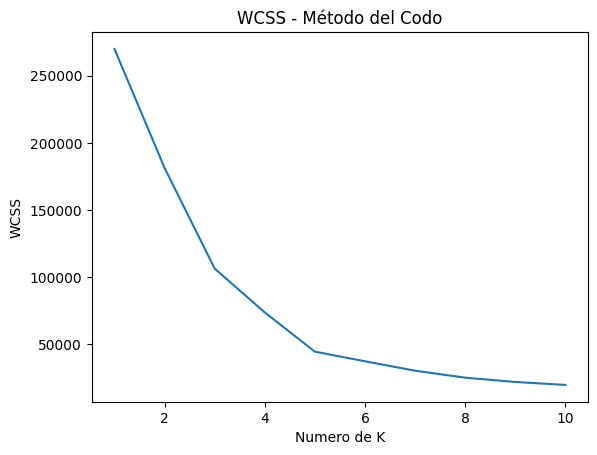

In [9]:
#Metodo del codo para saber cuantos k son optimos

from sklearn.cluster import KMeans


WCSS=[]
for i in range(1, 11):
    #ajusta el modelo Kmeans para cada k
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0) 
    kmeans.fit(X)
    #guarda las distancias a los baricentros por cada k
    WCSS.append(kmeans.inertia_)

#grafica
plt.plot(range(1,11), WCSS)
plt.title("WCSS - Método del Codo") 
plt.xlabel("Numero de K")  
plt.ylabel("WCSS")  
plt.show()


In [10]:
# Ajuste de Kmeans con numero optimo de k
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [11]:
#prediccion de los valores de x en 1 de los 5 grupos
y_pred = kmeans.predict(X)
y_pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

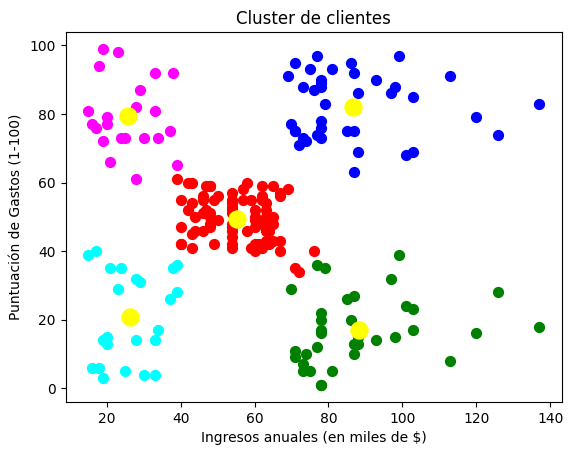

In [16]:
# Visualización de los grupos
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 50, c = "red", label = "Cautos")
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 50, c = "blue", label = "Estandard")
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 50, c = "green", label = "Objetivo")
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 50, c = "cyan", label = "Descuidados")
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 50, c = "magenta", label = "Conservadores")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 150, c = "yellow", label = "Baricentros")
plt.title("Cluster de clientes")
plt.xlabel("Ingresos anuales (en miles de $)")
plt.ylabel("Puntuación de Gastos (1-100)")
#plt.legend()
plt.show()